In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as dates
from datetime import datetime
import warnings

%matplotlib inline

In [4]:

# Windows
mpl.rc("font", family='Malgun Gothic')

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
# 데이터셋 로드
df =  pd.read_csv('/content/drive/MyDrive/cp2_log_data.csv')

In [6]:
# 불필요한 칼럼 제거
df = df.drop(['Unnamed: 0','category_code','division3'], axis=1)

In [7]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_id', 'user_session', 'division1', 'division2'],
      dtype='object')

In [8]:
df

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,division1,division2
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,unknown,unknown
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances,environment
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,unknown,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,furniture,living_room
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,computers,notebook
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,electronics,smartphone
...,...,...,...,...,...,...,...,...,...,...
38672585,2019-10-31 23:59:58+00:00,view,2300275,2053013560530830019,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193,electronics,camera
38672586,2019-10-31 23:59:58+00:00,view,10800172,2053013554994348409,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8,unknown,unknown
38672587,2019-10-31 23:59:58+00:00,view,5701038,2053013553970938175,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd,auto,accessories
38672588,2019-10-31 23:59:59+00:00,view,21407424,2053013561579406073,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204,electronics,clocks


In [9]:
# 방문자(ID) 수
visitor = df['user_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 2917467


In [10]:
# 대분류 count 수 (abc 순)
df['division1'].value_counts().sort_index()

accessories       237416
apparel          1537393
appliances       4963333
auto             1012448
computers        2321338
construction      730055
country_yard       14071
electronics     16124905
furniture        1242152
kids              519821
medicine           14794
sport             176262
stationery          7540
unknown          9771062
Name: division1, dtype: int64

In [11]:
# 대분류 count 수 (내림차 순)
df['division1'].value_counts()

electronics     16124905
unknown          9771062
appliances       4963333
computers        2321338
apparel          1537393
furniture        1242152
auto             1012448
construction      730055
kids              519821
accessories       237416
sport             176262
medicine           14794
country_yard       14071
stationery          7540
Name: division1, dtype: int64

In [12]:
# 대분류 안에 중분류 count 수 표시
df[['division1','division2']].groupby('division1')['division2'].value_counts().to_frame()

division2
division1   division2           
accessories bag           190017
            wallet         43476
            umbrella        3923
apparel     shoes        1206099
            costume       133199
...                          ...
sport       snowboard       3727
            tennis          3540
            ski             3005
stationery  cartrige        7540
unknown     unknown      9771062

[61 rows x 1 columns]

In [13]:
d = df.loc[:,['event_time','user_id']]

In [14]:
d['event_time'] = d['event_time'].apply(lambda s: str(s)[0:10])

In [15]:
visitor_by_date = d.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)

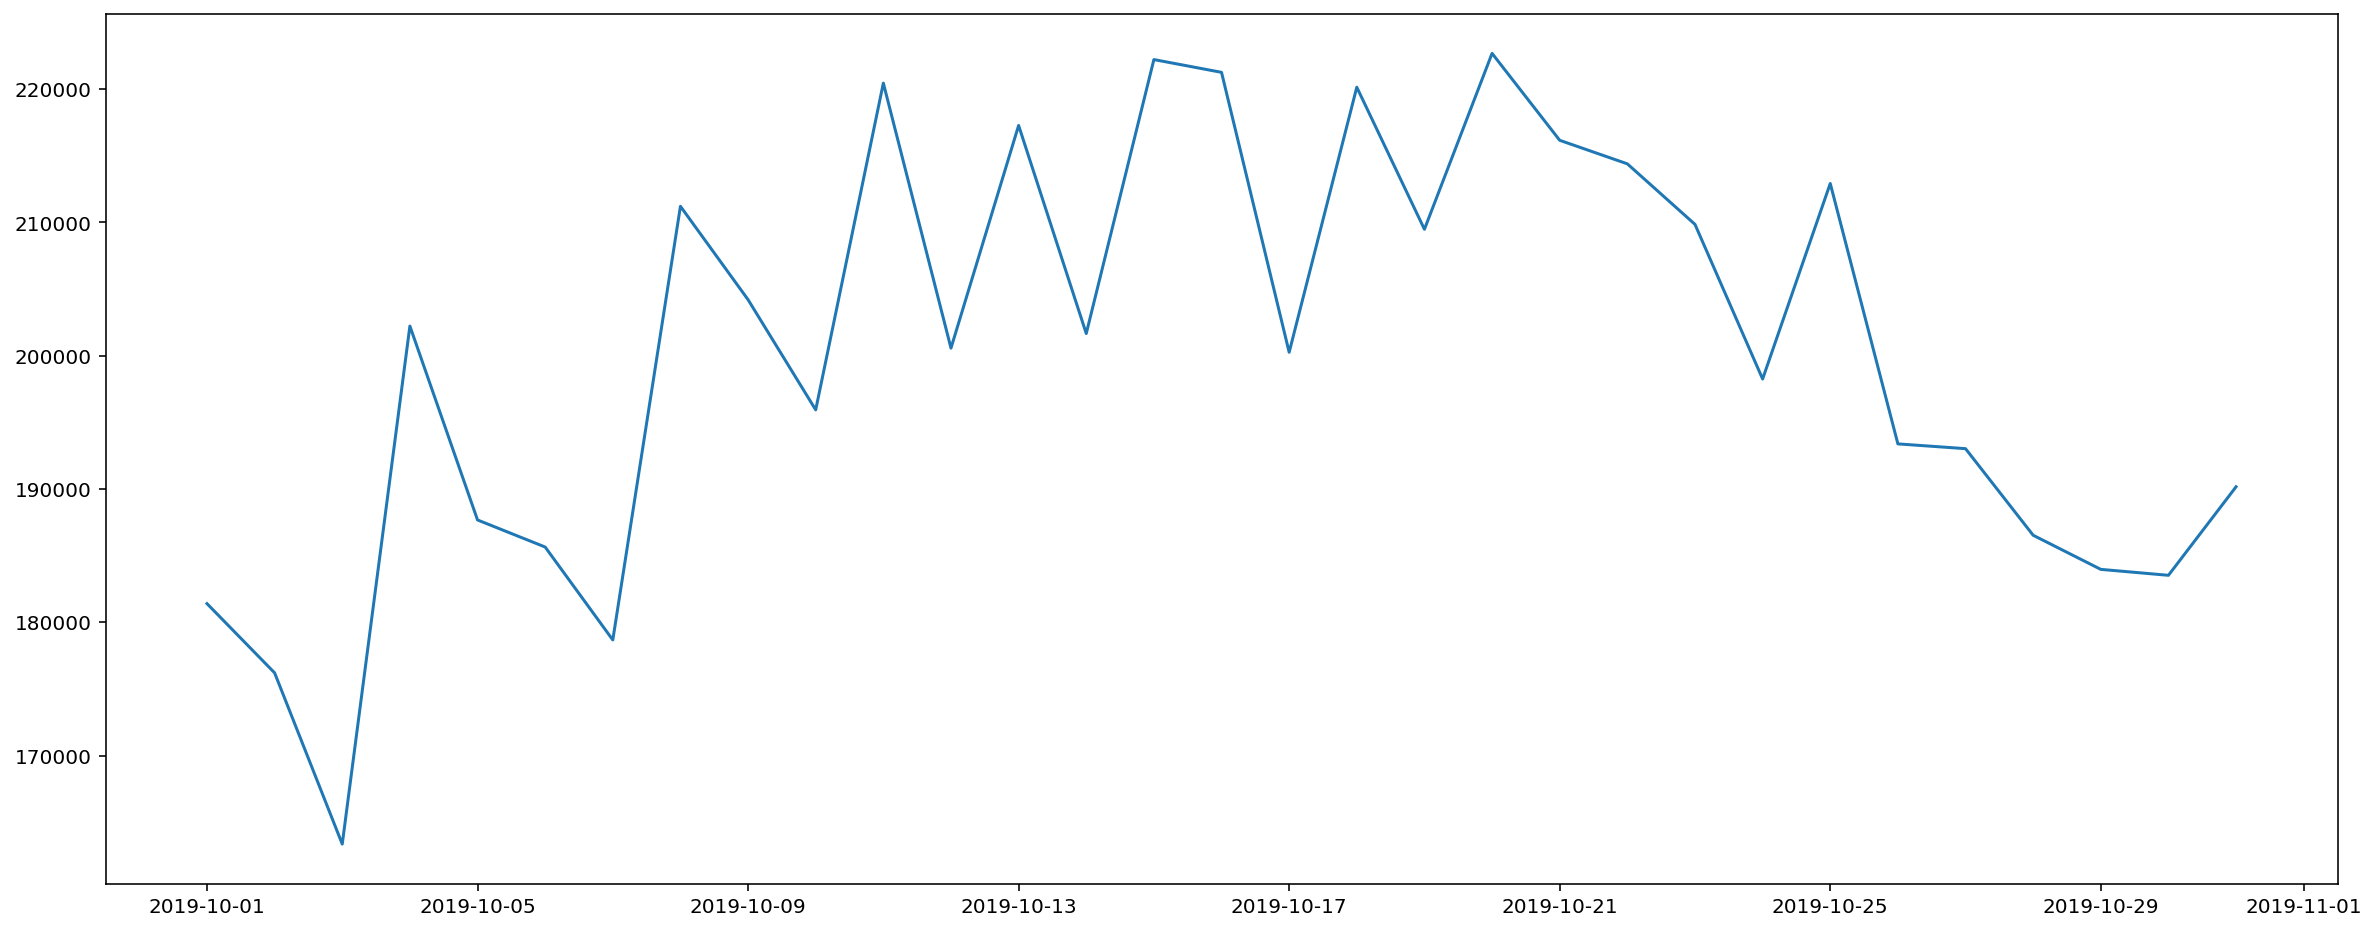

In [16]:
# 일별 방문자 수 변화 추이
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

10월 초 방문자 수가 급감 하기는 하나, 전체적인 방문자 수는 평이 하기 때문에 날짜별 의미있는 근거를 도출하기는 힘듬

In [17]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


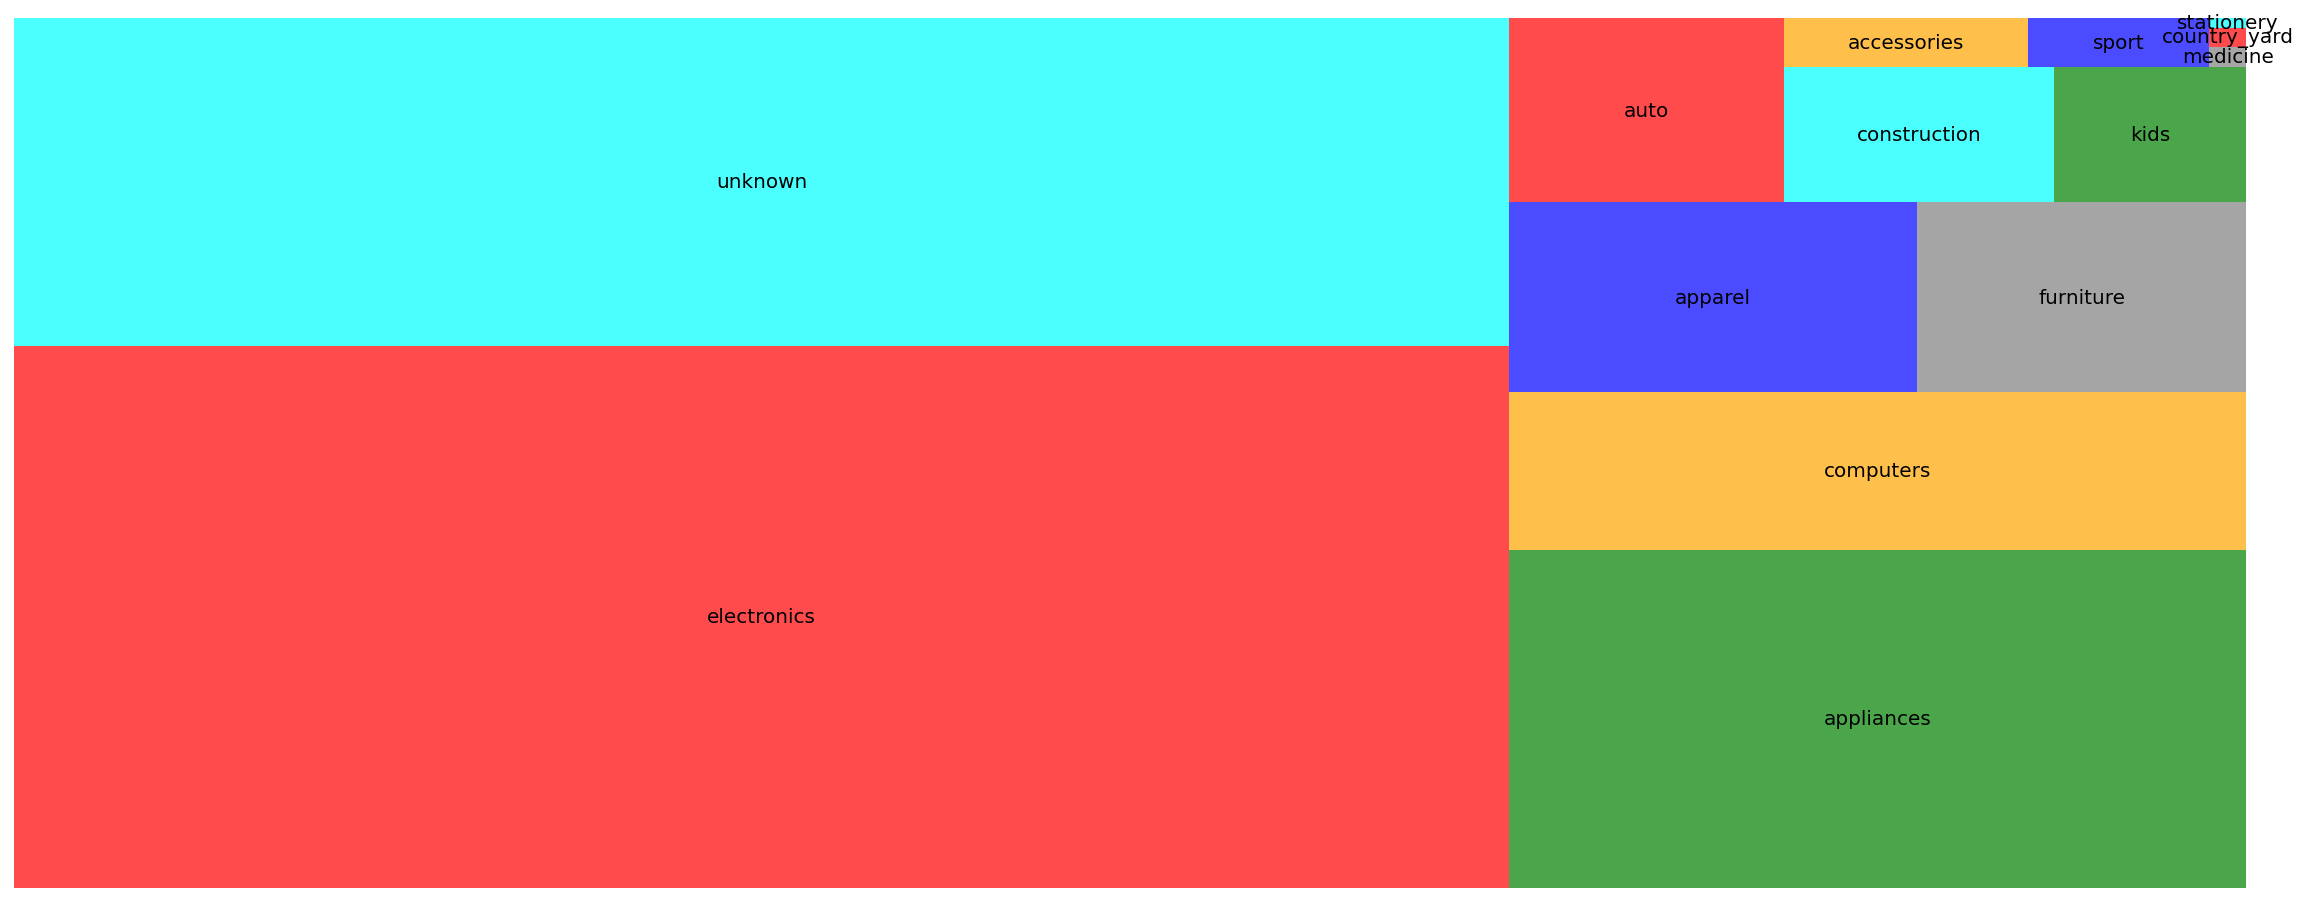

In [18]:
# 대분류별 차지하는 물품

import squarify

top_category_n = 30
top_category = df.loc[:,'division1'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

electronics가 가장 큰 비중을 차지하지만, 분류되지 않은 물품들과 apparel과 furniture의 비중도 만만치 않게 큼을 볼 수 있음.

비중이 큰 electronics 외에 다른 품목도 추천할 필요성이 있음

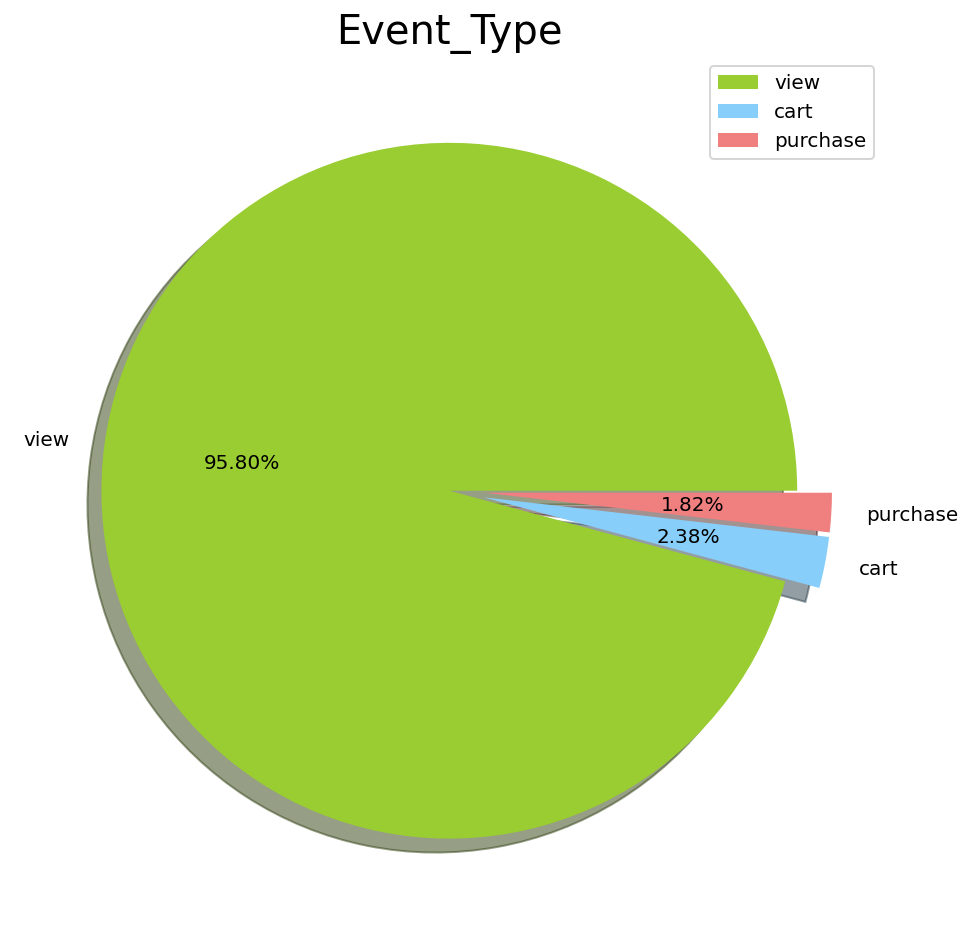

In [19]:
# view, cart, purchase 비중에 대한 분석
labels = ['view', 'cart','purchase']
size = df['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

남아있는 로그 중 view가 95.8%, cart와 purchase의 2.3%, 1.8%

In [20]:
purchase = df.loc[df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,division1,division2
150,2019-10-01 00:02:14+00:00,purchase,1004856,2053013555631882655,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone
286,2019-10-01 00:04:37+00:00,purchase,1002532,2053013555631882655,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone
348,2019-10-01 00:06:02+00:00,purchase,5100816,2053013553375346967,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,unknown,unknown
405,2019-10-01 00:07:07+00:00,purchase,13800054,2053013557418656265,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,bathroom
515,2019-10-01 00:09:26+00:00,purchase,4804055,2053013554658804075,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,audio


In [21]:
# 총 매출액
es = df.loc[df['event_type']=='purchase']
es['price'].sum()  

224580792.34

In [22]:
!pip install pandas-profiling==3.1.0  ## 판다스 프로파일링 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 5.1 MB/s 
     |████████████████████████████████| 102 kB 10.2 MB/s 
     |████████████████████████████████| 690 kB 46.7 MB/s 
     |████████████████████████████████| 3.1 MB 44.3 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 303 kB 14.7 MB/s 
     |████████████████████████████████| 296 kB 40.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b53ea3c2ac50abc317c5a77ca8c9e28f2911e19e68c6dbc45633982249c5b65e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: requests
    Found existing install

In [23]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

전체 38,672,590 개의 칼럼 중 'cart는 90만 개, 'purchase'는 70만개 정도

product_id(아이템)는 135,655 개

대분류는 총 14개, 중분류는 58개



In [24]:
df_price = df.loc[df['event_type']=='purchase']
df_price

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,division1,division2
150,2019-10-01 00:02:14+00:00,purchase,1004856,2053013555631882655,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone
286,2019-10-01 00:04:37+00:00,purchase,1002532,2053013555631882655,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone
348,2019-10-01 00:06:02+00:00,purchase,5100816,2053013553375346967,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,unknown,unknown
405,2019-10-01 00:07:07+00:00,purchase,13800054,2053013557418656265,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,bathroom
515,2019-10-01 00:09:26+00:00,purchase,4804055,2053013554658804075,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,audio
...,...,...,...,...,...,...,...,...,...,...
38671860,2019-10-31 23:53:53+00:00,purchase,1004767,2053013555631882655,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251,electronics,smartphone
38672049,2019-10-31 23:55:21+00:00,purchase,47500017,2110937143172923797,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c,construction,tools
38672135,2019-10-31 23:56:03+00:00,purchase,1003306,2053013555631882655,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,electronics,smartphone
38672220,2019-10-31 23:56:53+00:00,purchase,1004240,2053013555631882655,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,electronics,smartphone


In [25]:
# 매출을 가장 많이 발생 시키는 상위 10개 product_id
df_price1 = df_price[['product_id','price','division1']]
df_price1 = df_price1.groupby(['product_id','division1'], as_index=False).sum()
df_price1 = df_price1.sort_values('price', ascending=False)
df_price1.reset_index(drop=True)
df_price1 = df_price1.iloc[:10]
df_price1

,product_id,division1,price
780,1005115,electronics,12406807.35
770,1005105,electronics,10239248.68
337,1004249,electronics,6730112.92
800,1005135,electronics,5567806.64
543,1004767,electronics,5430723.43
32,1002544,electronics,4855702.39
611,1004856,electronics,3798956.42
19,1002524,electronics,3538299.12
102,1003317,electronics,3051294.26
621,1004870,electronics,3027098.05


In [26]:
# 가장 'purchase'의 수가 많은 product_id

df_count = df_price.groupby('product_id')['event_type'].count()
df_count = df_count.sort_values(ascending=False)
df_count = df_count.iloc[:10]
df_count = df_count.keys()
df_count

Int64Index([1004856, 1004767, 1004833, 1005115, 4804056, 1004870, 1002544,
            1004249, 1004836, 1005105],
           dtype='int64', name='product_id')

In [27]:
df_item = df.loc[df['product_id']==4804056]
df_item

# 가장 'purchse'의 수가 많은 10개 항목도 1개를 제외하고 스마트폰 (1개는 audio)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,division1,division2
477,2019-10-01 00:08:53+00:00,view,4804056,2053013554658804075,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,audio
510,2019-10-01 00:09:24+00:00,view,4804056,2053013554658804075,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,audio
539,2019-10-01 00:09:54+00:00,purchase,4804056,2053013554658804075,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,audio
568,2019-10-01 00:10:22+00:00,view,4804056,2053013554658804075,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,electronics,audio
607,2019-10-01 00:11:00+00:00,cart,4804056,2053013554658804075,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,electronics,audio
...,...,...,...,...,...,...,...,...,...,...
38672319,2019-10-31 23:57:45+00:00,view,4804056,2053013554658804075,apple,160.57,512509756,ad0f4dc6-4720-4be2-81c8-81685cd3e37c,electronics,audio
38672342,2019-10-31 23:57:57+00:00,view,4804056,2053013554658804075,apple,160.57,512804411,17c2230c-4566-085d-6f27-8e4d9792b204,electronics,audio
38672392,2019-10-31 23:58:25+00:00,view,4804056,2053013554658804075,apple,160.57,544501248,e330d051-37ad-4dc3-b1ee-ff16a28b7998,electronics,audio
38672491,2019-10-31 23:59:16+00:00,purchase,4804056,2053013554658804075,apple,160.57,544501248,e330d051-37ad-4dc3-b1ee-ff16a28b7998,electronics,audio


가장 많이 구입하는 것과 매출이 많은 item이 스마트폰 종류. 그 외에 로그가 적은 사람들에게 

추천을 할 때, 대분류 별 가장 구입 수 많은 10개를 추천해줌.

unknown,
appliances,
computers,
apparel,
furniture

In [28]:
# 대분류가 unkown일 경우 구입 수 많은 상위 10개 
df_item1 = df_price.loc[df_price['division1']=='unknown']
df_item1 = df_item1.groupby('product_id')['event_type'].count()
df_item1 = df_item1.sort_values(ascending=False)
df_item1 = df_item1.iloc[:10]
list(df_item1.keys())

[5100816,
 12703015,
 4100346,
 12703498,
 22700129,
 12703494,
 16500007,
 10701101,
 12703415,
 22700068]

In [29]:
# 대분류별 상위 10개의 product_id

category = ['unknown', 'appliances', 'computers', 'apparel', 'furniture']
    
for k in category:
    df_item1 = df_price.loc[df_price['division1']== k ]
    df_item1 = df_item1.groupby('product_id')['event_type'].count()
    df_item1 = df_item1.sort_values(ascending=False)
    df_item1 = df_item1.iloc[:10]
    print(k, ':', list(df_item1.keys()))

 

unknown : [5100816, 12703015, 4100346, 12703498, 22700129, 12703494, 16500007, 10701101, 12703415, 22700068]
appliances : [3700926, 3600661, 3600163, 3600666, 2900536, 3601405, 3601485, 2701657, 3601244, 3701134]
computers : [1307310, 1307073, 1307366, 1307067, 1306650, 1307074, 1307188, 1307187, 1306359, 1307350]
apparel : [28718083, 28715756, 28712682, 28715827, 28717034, 28715757, 28715829, 28716983, 28703609, 54900011]
furniture : [14701435, 17200570, 13201002, 17200651, 7101172, 7900440, 7100133, 14701260, 14701406, 14701532]


로그수를 기준으로 데이터셋 나누기

1. 구매 경험이 있는 사람의 경우

2. 로그수가 10 이상일 경우

3. 로그수가 10 미만인 경우

In [30]:
# 구매 경험 있는 로그 데이터셋

df_price

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,division1,division2
150,2019-10-01 00:02:14+00:00,purchase,1004856,2053013555631882655,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,electronics,smartphone
286,2019-10-01 00:04:37+00:00,purchase,1002532,2053013555631882655,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,electronics,smartphone
348,2019-10-01 00:06:02+00:00,purchase,5100816,2053013553375346967,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,unknown,unknown
405,2019-10-01 00:07:07+00:00,purchase,13800054,2053013557418656265,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,furniture,bathroom
515,2019-10-01 00:09:26+00:00,purchase,4804055,2053013554658804075,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,electronics,audio
...,...,...,...,...,...,...,...,...,...,...
38671860,2019-10-31 23:53:53+00:00,purchase,1004767,2053013555631882655,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251,electronics,smartphone
38672049,2019-10-31 23:55:21+00:00,purchase,47500017,2110937143172923797,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c,construction,tools
38672135,2019-10-31 23:56:03+00:00,purchase,1003306,2053013555631882655,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b,electronics,smartphone
38672220,2019-10-31 23:56:53+00:00,purchase,1004240,2053013555631882655,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,electronics,smartphone


In [31]:
# 구매 경험 있는 경우 자르기

spac = df[df['event_type'].str.contains('purchase')].index
df.drop(spac, inplace=True)


In [32]:
#로그 수를 기준으로 데이터셋 나누는 함수

def prepro(data,n):
    min_id = data['user_id'].value_counts() >= n
    min_id = min_id[min_id].index.to_list()
    data = data[data['user_id'].isin(min_id)]

    return data


def prepro_down(data,n):
    min_id = data['user_id'].value_counts() < n
    min_id = min_id[min_id].index.to_list()
    data = data[data['user_id'].isin(min_id)]

    return data

In [33]:
# 로그가 10 이상인 것 => 로그가 10 이상인 사람들 대상으로 추천시스템 넣기
df_10 = prepro(df, 10)

In [34]:
df_10

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,division1,division2
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,unknown,unknown
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,unknown,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,furniture,living_room
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,computers,notebook
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,electronics,smartphone
5,2019-10-01 00:00:05+00:00,view,1480613,2053013561092866779,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,computers,desktop
...,...,...,...,...,...,...,...,...,...,...
38672584,2019-10-31 23:59:58+00:00,view,2702331,2053013563911439225,lg,527.43,524356542,153f9818-4d32-4e8b-ba9f-f355094e8ae4,appliances,kitchen
38672585,2019-10-31 23:59:58+00:00,view,2300275,2053013560530830019,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193,electronics,camera
38672586,2019-10-31 23:59:58+00:00,view,10800172,2053013554994348409,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8,unknown,unknown
38672588,2019-10-31 23:59:59+00:00,view,21407424,2053013561579406073,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204,electronics,clocks


In [35]:
# 로그가 10 미만인 것  => 최빈값으로 추천을 해줌
df_zero = prepro_down(df, 10)
df_zero

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,division1,division2
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances,environment
6,2019-10-01 00:00:08+00:00,view,17300353,2053013553853497655,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d,unknown,unknown
7,2019-10-01 00:00:08+00:00,view,31500053,2053013558031024687,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6,unknown,unknown
8,2019-10-01 00:00:10+00:00,view,28719074,2053013565480109009,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,apparel,shoes
9,2019-10-01 00:00:11+00:00,view,1004545,2053013555631882655,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb,electronics,smartphone
...,...,...,...,...,...,...,...,...,...,...
38672568,2019-10-31 23:59:52+00:00,view,1002524,2053013555631882655,apple,531.26,565404816,d9cf0ac4-c3ec-4e1f-83aa-326b1e7b1581,electronics,smartphone
38672572,2019-10-31 23:59:53+00:00,view,1004708,2053013555631882655,huawei,151.99,566031393,8fbc7d60-6ae5-41c9-985c-cee9c52ab9ae,electronics,smartphone
38672581,2019-10-31 23:59:58+00:00,view,12800151,2053013552788144369,sony,8.49,544578298,fb46b2fb-493b-477c-8d18-ea1c24c04020,unknown,unknown
38672583,2019-10-31 23:59:58+00:00,view,1004870,2053013555631882655,samsung,275.25,518956209,6764041a-9285-4869-8a32-a79adf31d212,electronics,smartphone
